<p style="background-color:lightblue;font-family:newtimeroman;font-size:200%;color:black;text-align:center;border-radius:20px 20px;"><b>EDA Project - Online Shopping</b></p>

<b>Contains:</b>
<ul>
<li><a href="#import-library">Importing Libraries</a></li>
<li><a href="#loading-dataset">Loading The Dataset</a></li>
<li><a href="#understanding-dataset">Understanding The Dataset</a></li>
<li><a href="#organizing-columns">Organizing Columns</a></li>
<li><a href="#nan-values">NaN Values</a></li>
<li><a href="#data-visualization">Data Visualization</a></li>
<li><a href="#conclusion">Conclusion</a></li>
</ul>

<a id='import-library'></a>
# <font color='navy'> <b>Importing Libraries</b><font color='black'> 

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
import plotly.express as px

from skimpy import skim

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<a id='loading-dataset'></a>
# <font color='navy'> <b>Loading The Dataset</b><font color='black'> 

In [46]:
df0 = pd.read_csv("dataset.csv")
df = df0.copy()

In [47]:
df.head()

,User ID,Age,Gender,Country,Purchase Amount,Purchase Date,Product Category
0,1,56.0,Female,USA,331.79,2021-11-21,Sports
1,2,69.0,Male,Australia,335.72,2022-03-05,Home & Kitchen
2,3,46.0,NaN,Germany,493.18,NaN,Books
3,4,32.0,Male,Germany,80.97,2023-06-08,Sports
4,5,60.0,Female,UK,21.75,NaN,Beauty


In [48]:
df.sample(5)

,User ID,Age,Gender,Country,Purchase Amount,Purchase Date,Product Category
2940,2941,45.0,Other,USA,NaN,2022-04-26,Home & Kitchen
11166,11167,61.0,Male,Canada,183.26,2020-10-17,Books
6283,6284,23.0,Female,Germany,398.76,2020-04-11,Books
12530,12531,65.0,Male,Canada,246.23,NaN,Sports
11657,11658,NaN,Other,UK,482.82,2020-12-10,Books


<a id='understanding-dataset'></a>
# <font color='navy'> <b>Understanding The Dataset</b><font color='black'> 

In [50]:
df.shape

(15000, 7)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User ID           15000 non-null  int64  
 1   Age               13500 non-null  float64
 2   Gender            14250 non-null  object 
 3   Country           13800 non-null  object 
 4   Purchase Amount   13200 non-null  float64
 5   Purchase Date     13950 non-null  object 
 6   Product Category  14100 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 820.4+ KB


In [52]:
df.isnull().sum()

User ID                0
Age                 1500
Gender               750
Country             1200
Purchase Amount     1800
Purchase Date       1050
Product Category     900
dtype: int64

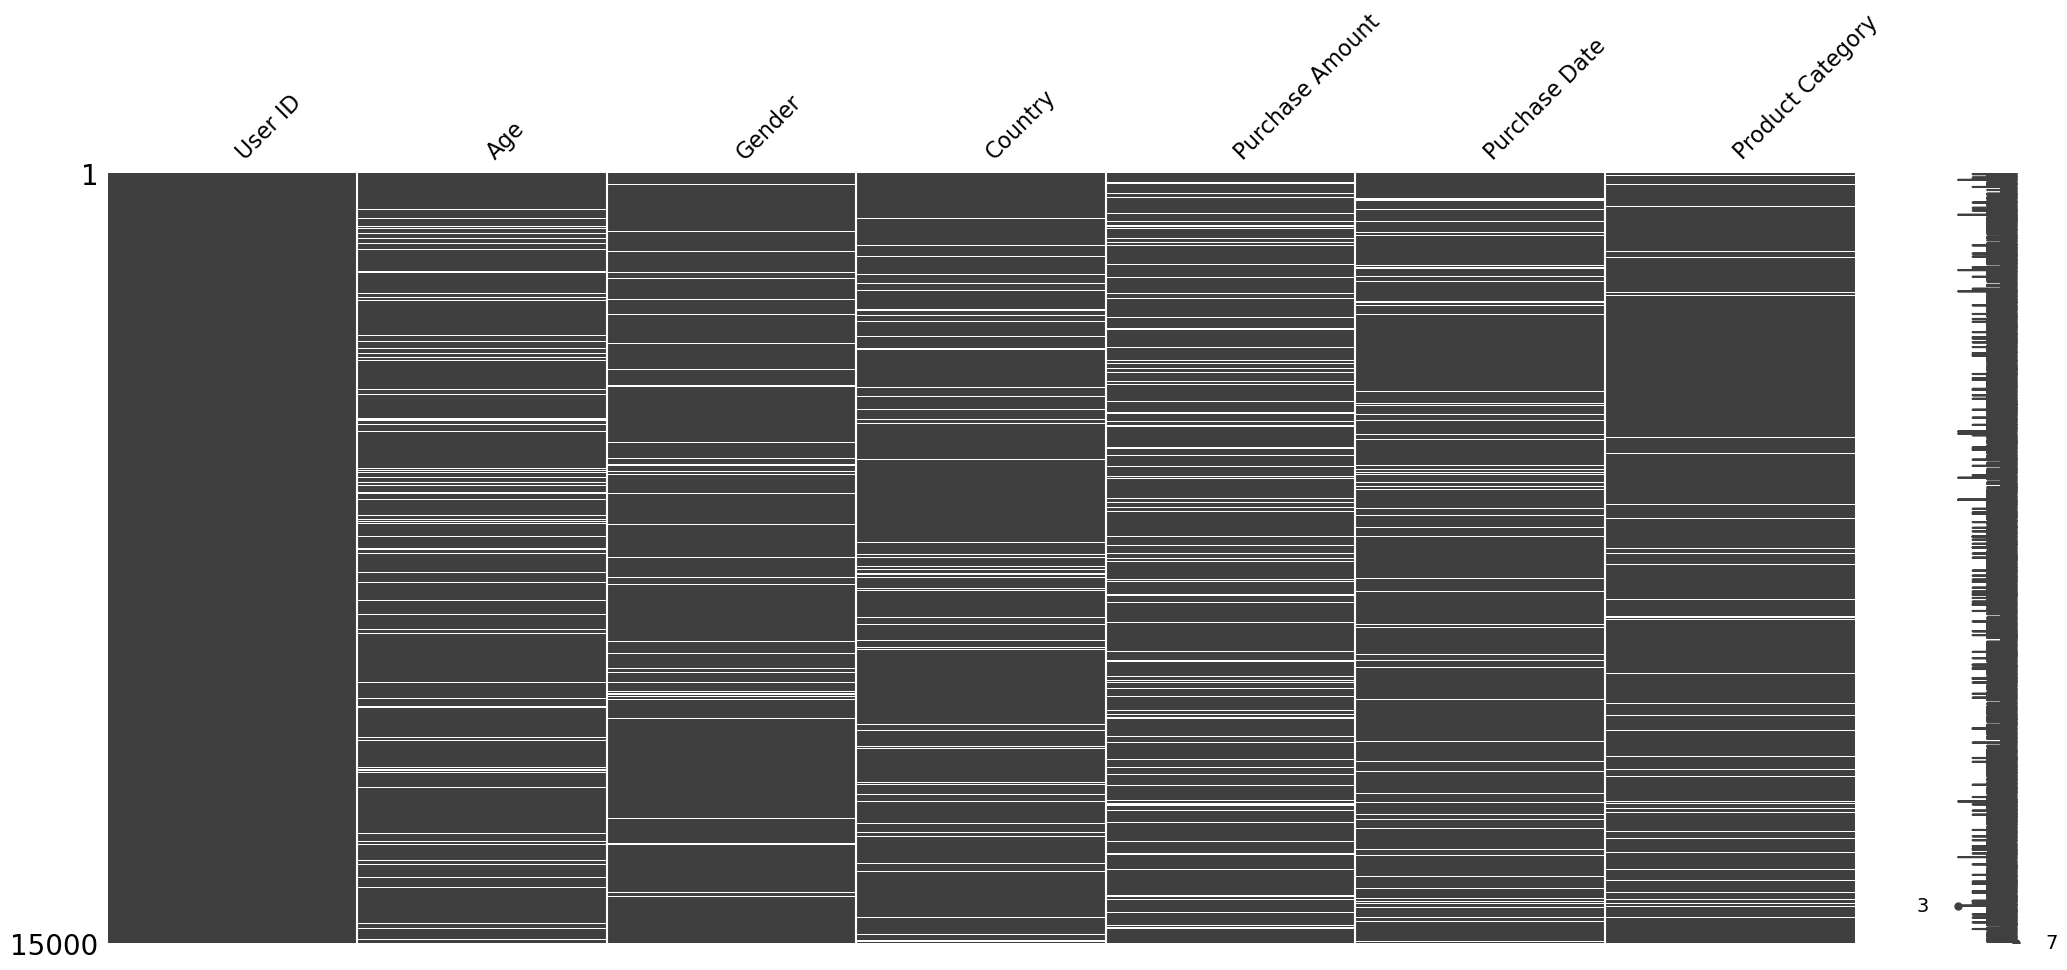

In [53]:
msno.matrix(df);

In [54]:
df.nunique()

User ID             15000
Age                    52
Gender                  3
Country                 6
Purchase Amount     11608
Purchase Date        1460
Product Category        6
dtype: int64

In [55]:
df.duplicated().sum()

0

In [56]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,15000.0,7500.50000,4330.271354,1.00,3750.750,7500.500,11250.250,15000.00
Age,13500.0,43.39600,14.927082,18.00,31.000,43.000,56.000,69.00
Purchase Amount,13200.0,253.21772,143.113919,5.05,130.335,253.645,378.585,499.95


In [57]:
df.describe(include= "object").T

,count,unique,top,freq
Gender,14250,3,Female,4818
Country,13800,6,France,2444
Purchase Date,13950,1460,2022-04-28,26
Product Category,14100,6,Clothing,2444


In [58]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 15000  │ │ string      │ 4     │                                                          │
│ │ Number of columns │ 7      │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name        ┃ NA    ┃ NA %  ┃ mean   ┃ sd     ┃ p0    ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ User ID            │     0 │     0 │   7500 │   4330 │     1 │   3751 │   7500 │  11250 │  15000 │ ▇▇▇▇▇▇  │  │
│ │ Age                │  1500 │    10 │   43.4 │  14.93 │    18 │     31 │     43 │     56 │     69 │ ▇▇▇▇▇▇  │  │
│ │ Purchase Amount    │  1800 │    12 │  253.2 │  143.1 │  5.05 │  130.3 │  253.6 │  378.6 │  499.9 │ ▇▇▇▇▇▇  │  │
│ └────────────────────┴───────┴───────┴────────┴────────┴───────┴────────┴────────┴────────┴────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                     ┃ NA        ┃ NA %      ┃ words per row             ┃ total words          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Gender                          │       750 │         5 │                      0.95 │                14250 │  │
│ │ Country                         │      1200 │         8 │                      0.92 │                13800 │  │
│ │ Purchase Date                   │      1050 │         7 │                      0.93 │                13950 │  │
│ │ Product Category                │       900 │         6 │                       1.3 │                18818 │  │
│ └─────────────────────────────────┴───────────┴───────────┴───────────────────────────┴──────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

<a id='organizing-columns'></a>
# <font color='navy'> <b>Organizing Columns</b><font color='black'> 

In [60]:
df.columns

Index(['User ID', 'Age', 'Gender', 'Country', 'Purchase Amount',
       'Purchase Date', 'Product Category'],
      dtype='object')

In [61]:
df.columns = df.columns.str.lower()

In [62]:
df.columns = ['user_id', 'age', 'gender', 'country', 'purchase_amount',
       'purchase_date', 'category']

In [63]:
df.columns

Index(['user_id', 'age', 'gender', 'country', 'purchase_amount',
       'purchase_date', 'category'],
      dtype='object')

## <font color='#40E0D0'> <b>"age" Column</b><font color='black'> 

In [65]:
df.age.unique()

array([56., 69., 46., 32., 60., nan, 38., 36., 40., 28., 41., 53., 57.,
       20., 19., 61., 55., 50., 29., 39., 42., 66., 44., 59., 33., 64.,
       68., 54., 26., 35., 21., 31., 67., 43., 37., 24., 25., 34., 23.,
       51., 27., 48., 65., 62., 58., 18., 52., 22., 45., 49., 47., 30.,
       63.])

In [66]:
df.age.isnull().sum()

1500

In [67]:
df.age.dtype

dtype('float64')

The dtype of the age column will be changed after filling the NaN values.

## <font color='#40E0D0'> <b>"gender" Column</b><font color='black'> 

In [70]:
df.gender.unique()

array(['Female', 'Male', nan, 'Other'], dtype=object)

In [71]:
df.gender.isnull().sum()

750

In [72]:
df.gender.dtype

dtype('O')

The dtype of the gender column will be changed after filling the NaN values.

## <font color='#40E0D0'> <b>"country" Column</b><font color='black'> 

In [75]:
df.country.unique()

array(['USA', 'Australia', 'Germany', 'UK', 'France', 'Canada', nan],
      dtype=object)

In [76]:
df.country.isnull().sum()

1200

In [77]:
df.country.dtype

dtype('O')

The dtype of the country column will be changed after filling the NaN values.

## <font color='#40E0D0'> <b>"purchase_amount" Column</b><font color='black'> 

In [80]:
df.purchase_amount.nunique()

11608

In [81]:
df.purchase_amount.dtype

dtype('float64')

In [82]:
df.purchase_amount.unique()

array([331.79, 335.72, 493.18, ...,  27.73, 108.57, 105.57])

## <font color='#40E0D0'> <b>"purchase_date" Column</b><font color='black'> 

In [84]:
df.purchase_date.nunique()

1460

In [85]:
df.purchase_date.unique()

array(['2021-11-21', '2022-03-05', nan, ..., '2023-09-03', '2023-10-27',
       '2023-01-07'], dtype=object)

In [86]:
df.purchase_date.dtype

dtype('O')

The dtype of the purchase_date column will be changed after filling the NaN values.

## <font color='#40E0D0'> <b>"category" Column</b><font color='black'> 

In [89]:
df.category.unique()

array(['Sports', 'Home & Kitchen', 'Books', 'Beauty', 'Clothing', nan,
       'Electronics'], dtype=object)

The dtype of the category column will be changed after filling the NaN values.

<a id='nan-values'></a>
# <font color='navy'> <b>NaN Values</b><font color='black'> 

## <font color='#40E0D0'> <b>NaN Values In "country" Column</b><font color='black'> 

In [93]:
df.country.isnull().sum()

1200

In [94]:
df.country.value_counts()

country
France       2444
Germany      2330
Canada       2279
UK           2261
Australia    2256
USA          2230
Name: count, dtype: int64

In [95]:
countries = df.country.value_counts().index
countries

Index(['France', 'Germany', 'Canada', 'UK', 'Australia', 'USA'], dtype='object', name='country')

In [96]:
df['country'] = df['country'].apply(lambda x: x if pd.notna(x) else np.random.choice(countries))

In [97]:
df.country.value_counts()

country
France       2639
Germany      2537
Canada       2477
Australia    2459
UK           2457
USA          2431
Name: count, dtype: int64

In [98]:
df.country.isnull().sum()

0

## <font color='#40E0D0'> <b>NaN Values In "category" Column</b><font color='black'> 

In [100]:
df.category.isnull().sum()

900

In [101]:
df['category'] = df['category'].fillna(df.groupby('country')['category'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else None))

In [102]:
df.category.isnull().sum()

0

## <font color='#40E0D0'> <b>NaN Values In "gender" Column</b><font color='black'> 

In [104]:
df.gender.isnull().sum()

750

In [105]:
df.gender.value_counts()

gender
Female    4818
Other     4742
Male      4690
Name: count, dtype: int64

In [106]:
df.groupby(["category", "country"])["gender"].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

category        country  
Beauty          Australia     Other
                Canada       Female
                France         Male
                Germany        Male
                UK           Female
                USA          Female
Books           Australia      Male
                Canada       Female
                France         Male
                Germany       Other
                UK           Female
                USA          Female
Clothing        Australia      Male
                Canada       Female
                France       Female
                Germany       Other
                UK             Male
                USA           Other
Electronics     Australia     Other
                Canada        Other
                France       Female
                Germany       Other
                UK             Male
                USA          Female
Home & Kitchen  Australia    Female
                Canada        Other
                France       Female
  

In [107]:
df['gender'] = df['gender'].fillna(df.groupby(["category", "country"])["gender"].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else None))

In [108]:
df.gender.isnull().sum()

0

## <font color='#40E0D0'> <b>NaN Values In "age" Column</b><font color='black'> 

In [110]:
df.age.isnull().sum()

1500

In [111]:
df.age.mean()

43.396

In [112]:
df.age.median()

43.0

In [113]:
df.groupby(['category', 'gender'])['age'].mean().round(0)

category        gender
Beauty          Female    44.0
                Male      44.0
                Other     45.0
Books           Female    44.0
                Male      43.0
                Other     43.0
Clothing        Female    43.0
                Male      43.0
                Other     44.0
Electronics     Female    43.0
                Male      44.0
                Other     43.0
Home & Kitchen  Female    43.0
                Male      44.0
                Other     43.0
Sports          Female    43.0
                Male      43.0
                Other     44.0
Name: age, dtype: float64

In [114]:
df['age'] = df['age'].fillna(df.groupby(['category', 'gender'])['age'].transform("mean")).round(0)

In [115]:
df.age.isnull().sum()

0

## <font color='#40E0D0'> <b>NaN Values In "purchase_amount" Column</b><font color='black'> 

In [117]:
df.purchase_date.isnull().sum()

1050

In [118]:
df.groupby(['country', 'category'])['purchase_amount'].mean()

country    category      
Australia  Beauty            249.100631
           Books             249.681606
           Clothing          256.357105
           Electronics       258.364026
           Home & Kitchen    244.232423
           Sports            248.999753
Canada     Beauty            253.231268
           Books             260.507470
           Clothing          255.206733
           Electronics       241.762571
           Home & Kitchen    244.796619
           Sports            256.744771
France     Beauty            260.685126
           Books             242.780862
           Clothing          247.773446
           Electronics       255.572143
           Home & Kitchen    257.275890
           Sports            246.420401
Germany    Beauty            246.304012
           Books             266.130872
           Clothing          259.069682
           Electronics       263.560314
           Home & Kitchen    246.544380
           Sports            248.808174
UK         Bea

In [119]:
df["purchase_amount"] = df["purchase_amount"].fillna(df.groupby(['country', 'category'])['purchase_amount'].transform('mean'))

In [120]:
df.purchase_amount.isnull().sum()

0

## <font color='#40E0D0'> <b>NaN Values In "purchase_date" Column</b><font color='black'> 

In [122]:
df.purchase_amount.isnull().sum()

0

In [123]:
df['purchase_date'] = df.groupby(['country', 'category'])['purchase_date'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

In [124]:
df.purchase_amount.isnull().sum()

0

In [125]:
# after filling the NaN values
df.isnull().sum().sum()

0

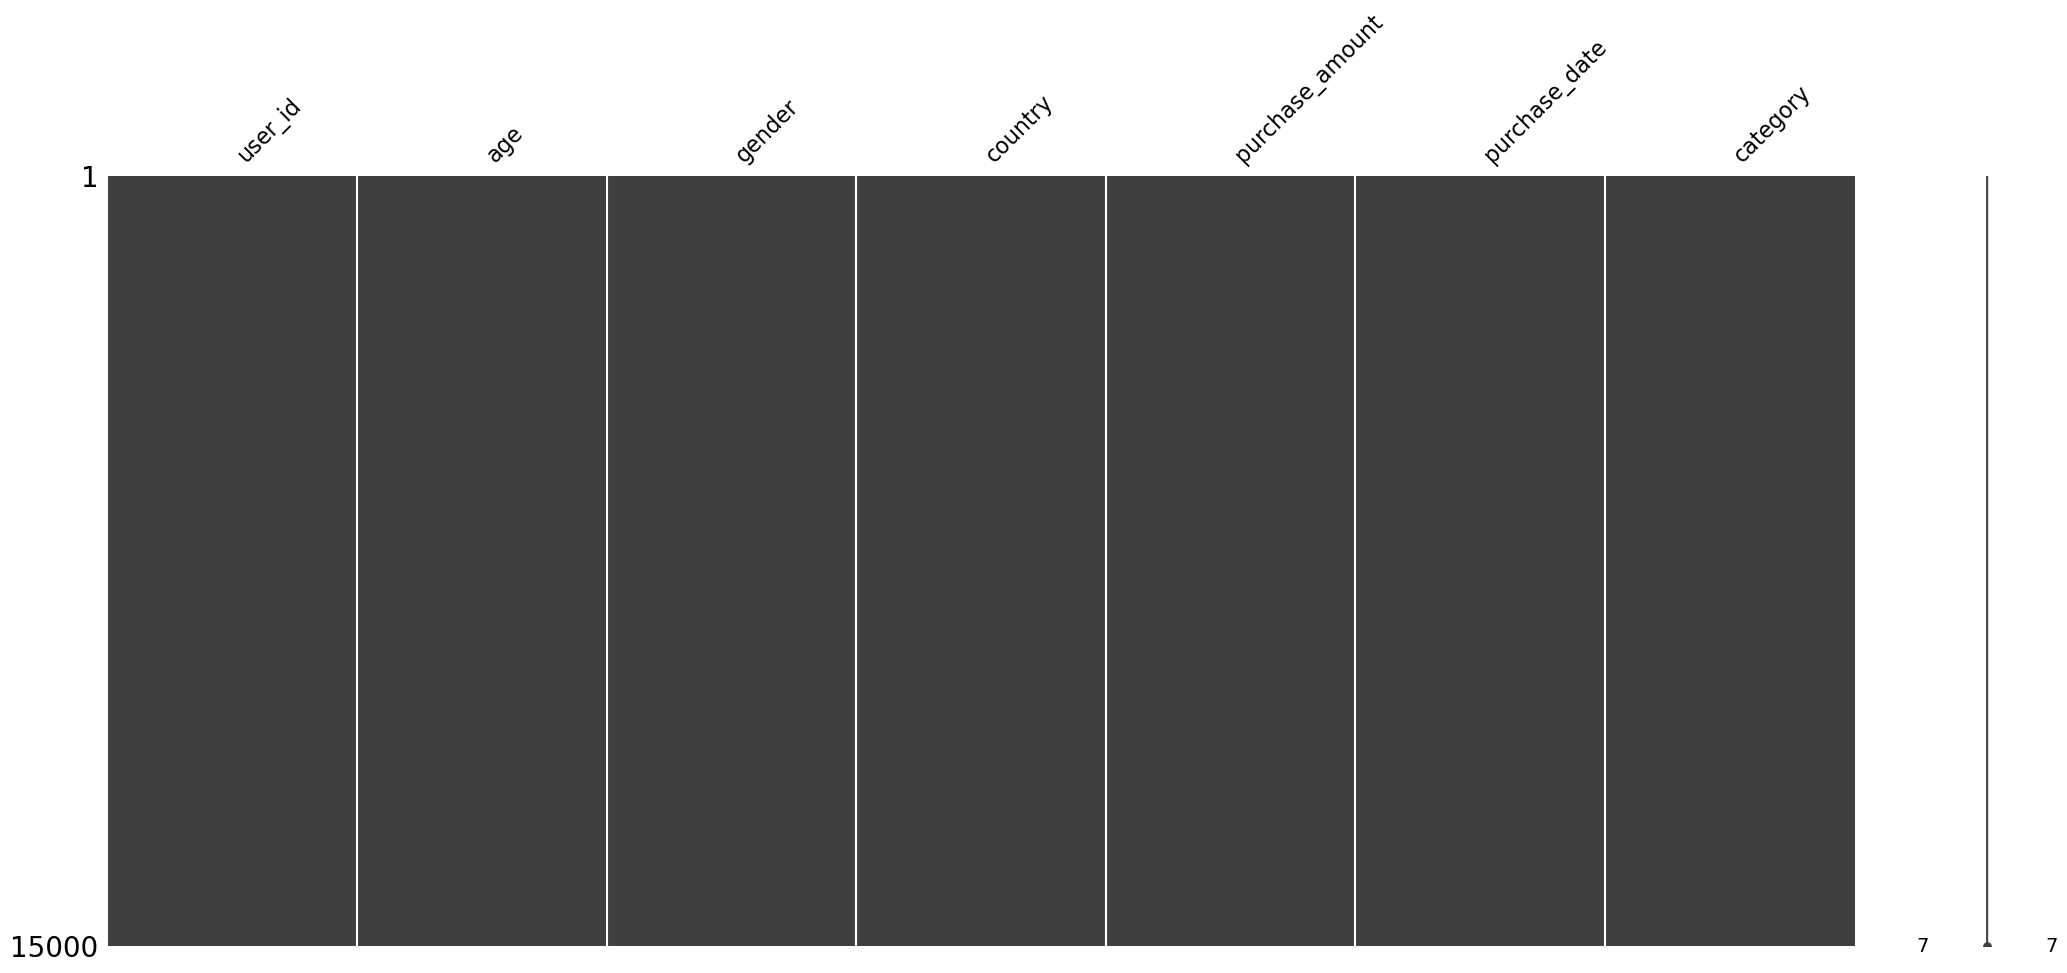

In [126]:
msno.matrix(df);

### <font color='#40E0D0'> <b>Changing Dtypes of Columns</b><font color='black'> 

In [128]:
df.age = df.age.astype("int")

In [129]:
df['purchase_date'] = pd.to_datetime(df['purchase_date'])

In [130]:
df['category'] = df['category'].astype('category')

In [131]:
df['gender'] = df['gender'].astype('category')

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   user_id          15000 non-null  int64         
 1   age              15000 non-null  int32         
 2   gender           15000 non-null  category      
 3   country          15000 non-null  object        
 4   purchase_amount  15000 non-null  float64       
 5   purchase_date    15000 non-null  datetime64[ns]
 6   category         15000 non-null  category      
dtypes: category(2), datetime64[ns](1), float64(1), int32(1), int64(1), object(1)
memory usage: 557.1+ KB


<a id='data-visualization'></a>
# <font color='navy'> <b>Data Visualization</b><font color='black'> 

## <font color='#40E0D0'> <b>Distribution of Gender</b><font color='black'> 

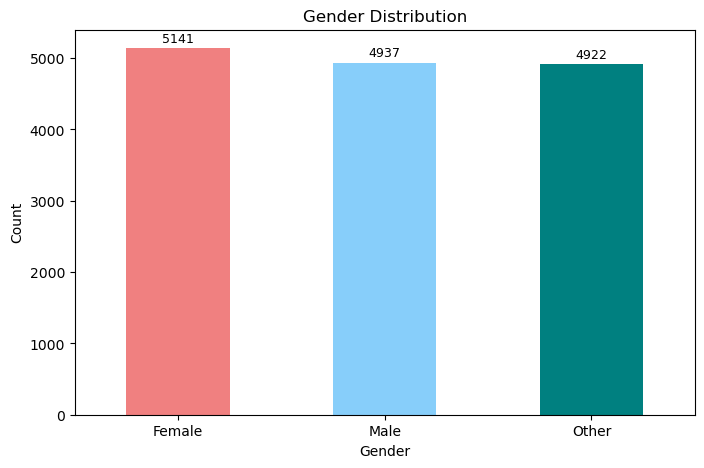

In [330]:
gender_counts = df['gender'].value_counts()

plt.figure(figsize=(8, 5))
ax1 = gender_counts.plot(kind='bar', color= ['lightcoral', 'lightskyblue', 'teal'])

for container in ax1.containers:
    ax1.bar_label(container, fmt='%d', label_type='edge', fontsize=9, color='black', padding=2)

plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.show()

This graph illustrates the gender distribution within the dataset. The numbers of male and female users are nearly equal, indicating a balanced gender representation. The "other" category, while smaller, still represents a meaningful portion of users that should not be overlooked. The balanced gender distribution suggests that purchase behaviors or user activity may be similar across male and female groups. However, the "other" category, though smaller, should also be considered in future analyses to understand their specific purchasing patterns or behaviors.

## <font color='#40E0D0'> <b>Distributions of Total Purchase Amount by Country</b><font color='black'> 

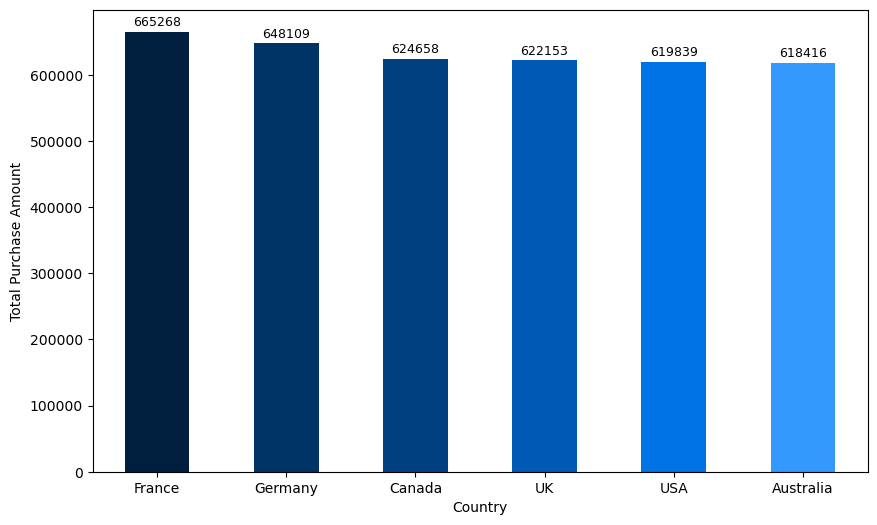

In [350]:
top_countries = df.groupby('country')['purchase_amount'].sum().nlargest(10)

plt.figure(figsize=(10, 6))
ax2 = top_countries.plot(kind='bar', color= ["#001f3f", "#003366", "#004080", "#0059b3", "#0073e6", "#3399ff"])

for container in ax2.containers:
    ax2.bar_label(container, fmt='%d', label_type='edge', fontsize=9, color='black', padding=2)

plt.xlabel('Country')
plt.ylabel('Total Purchase Amount')
plt.xticks(rotation=0)

plt.show()

This graph compares the total purchase amounts across different countries. We observe that the purchase amounts are fairly consistent across all countries, with **France, Canada, and Germany leading slightly**. This suggests a global customer base with relatively balanced spending across regions. Such an analysis indicates that businesses might not need to tailor distinct strategies for individual countries since spending behavior is relatively consistent across regions. However, small differences could still offer insights for fine-tuning marketing strategies.

## <font color='#40E0D0'> <b>Prices by Product Category</b><font color='black'> 

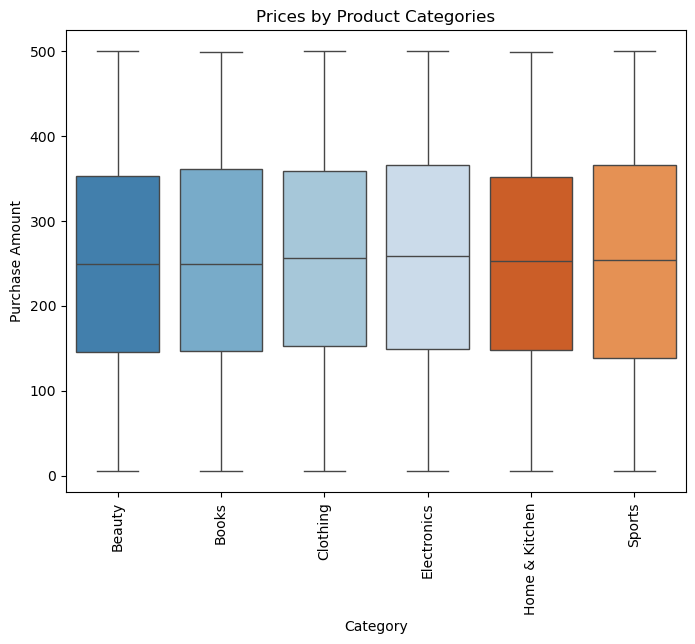

In [266]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='category', y='purchase_amount', data=df, palette='tab20c')
plt.title("Prices by Product Categories")
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Purchase Amount")
plt.show()

The boxplot illustrates the price distribution across product categories. Prices are generally within a similar range, though some categories like **"Home & Kitchen"** and **"Books"** show slightly higher median prices. This could indicate that these categories contain more expensive products compared to others. The presence of outliers in several categories suggests either luxury or discounted items, providing opportunities for further segmentation or targeted promotions. Understanding these price distributions can help in aligning pricing strategies with customer expectations.

## <font color='#40E0D0'> <b>Age Distribution</b><font color='black'> 

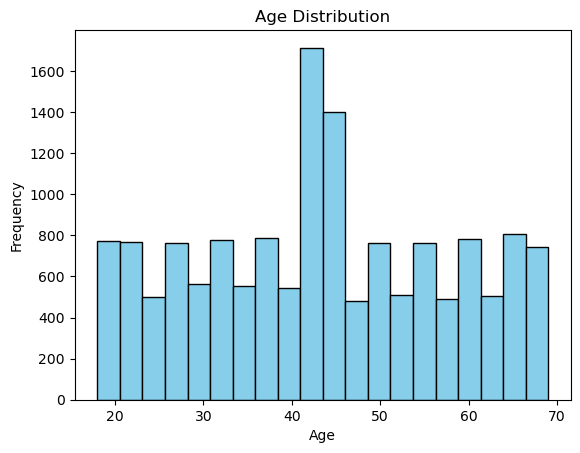

In [270]:
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

The age distribution graph shows the spread of users by age, with the highest concentration around age 25. This indicates that the majority of users are younger, with a smaller peak in the 30s. The large presence of younger users suggests that they might be more active in purchasing or engaging with products. Marketing strategies targeting this age group could yield better results. However, older users should not be overlooked, as they may have greater purchasing power despite their smaller representation.

## <font color='#40E0D0'> <b>Total Purchase Amount by Gender</b><font color='black'> 

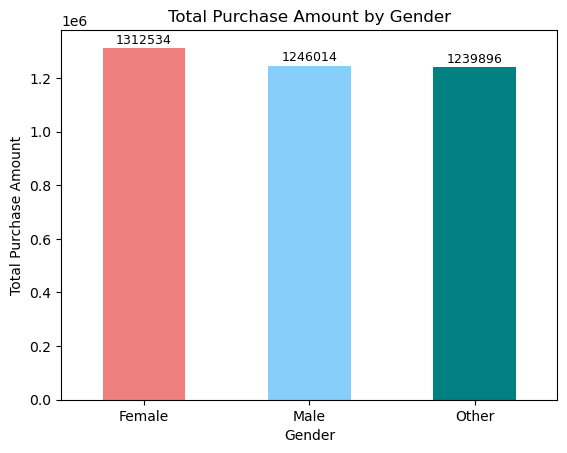

In [280]:
ax3 = df.groupby('gender')['purchase_amount'].sum().plot(kind='bar', color=['lightcoral', 'lightskyblue', 'teal'])

for container in ax3.containers:
    ax3.bar_label(container, fmt='%d', label_type='edge', fontsize=9, color='black', padding=1)

plt.title('Total Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Purchase Amount')
plt.xticks(rotation=0)

plt.show()

This graph compares the total purchase amounts by gender, showing that male and female users have nearly identical spending levels. The "other" category has significantly lower total purchases. This suggests that purchasing behavior is similar across male and female users.

## <font color='#40E0D0'> <b>Purchase Distribution by Country</b><font color='black'> 

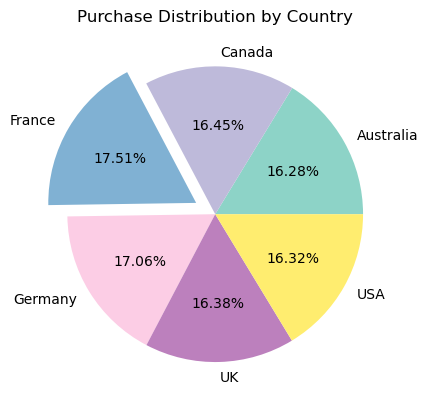

In [300]:
df.groupby('country')['purchase_amount'].sum().plot(kind='pie',
                                                    autopct='%1.2f%%',
                                                    explode= [0,0,0.15,0,0,0],
                                                    colormap='Set3'
                                                   )

plt.title('Purchase Distribution by Country')
plt.ylabel('')

plt.show()

The pie chart illustrates the distribution of purchases by country, with France, Australia, and the USA contributing the most. While these countries dominate the market, other regions like Germany and the UK also make significant contributions. This distribution helps identify the strongest markets and potential areas for growth or expansion.

## <font color='#40E0D0'> <b>Gender Distribution by Country</b><font color='black'> 

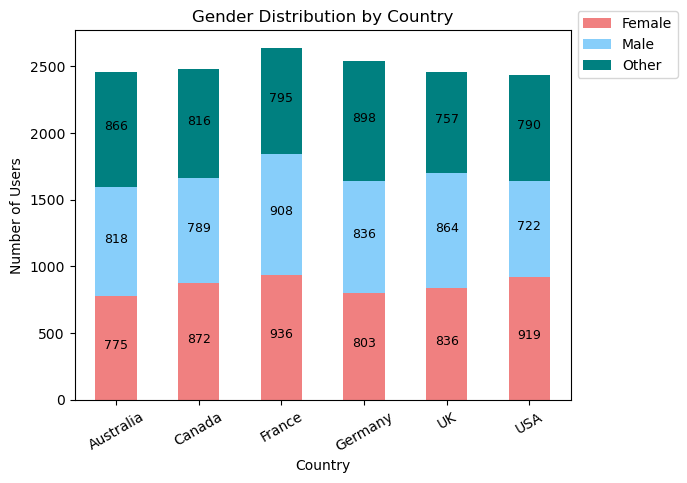

In [332]:
ax4 = df.groupby(['country', 'gender'])['user_id'].count().unstack().plot(kind='bar',
                                                                          stacked=True,
                                                                          color=['lightcoral', 'lightskyblue', 'teal']
                                                                         )

for container in ax4.containers:
    ax4.bar_label(container, fmt='%d', label_type='center', fontsize=9, color='black', padding=2)

plt.title('Gender Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Number of Users')
plt.xticks(rotation= 30)
plt.legend(bbox_to_anchor= (1.23,1.07))

plt.show()

The stacked bar chart displays gender distribution by country, showing a balanced representation of male and female users across all regions. The "other" category has fewer users in every country. This data suggests that marketing strategies can be designed with gender balance in mind for each region, though specialized approaches might be necessary for the "other" category.

<a id='conclusion'></a>
# <font color='navy'> <b>Conclusion</b><font color='black'> 

In this project, several steps were taken to analyze user behavior and demographic information. Initially, the missing (NaN) values in the dataset were filled using various imputation techniques, ensuring that the dataset was complete and reliable. After addressing the NaN values, data visualization techniques were applied to understand the overall structure of the dataset.

The analyses focused on examining distributions of variables such as gender, age, country, and purchase amounts, which revealed the demographic and geographic composition of the user base. For instance, the gender distribution charts indicated a balanced user base of both male and female users, while the age distribution showed that young adults, particularly those between 25-30 years old, were more active. Additionally, examining total purchase amounts by country revealed relatively balanced spending across different regions.

These visualizations provided valuable insights into which demographic groups could be targeted in future business strategies and which geographic markets might require more focus. Tailored marketing strategies based on age groups and gender distributions could prove useful for identifying growth opportunities.

Overall, this project has facilitated the correction of data gaps and the extraction of key user insights through visualizations. The findings can be utilized to optimize marketing strategies and gain a better understanding of customer segments, ultimately supporting improved decision-making and business performance.

<p style="background-color:lightblue;font-family:newtimeroman;font-size:200%;color:black;text-align:center;border-radius:20px 20px;"><b>THANK YOU!</b></p>